In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

swiggy=pd.read_csv(r'D:\All project set\Projects\Python EDA Project\swiggy.csv')
swiggy.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [3]:
print("\n Shape of dataset : ",swiggy.shape)
print("\n Column names : ",swiggy.columns)
print("\n Data Types : ",swiggy.dtypes, "\n")
print("\n Basic Information : ",swiggy.info())
print("\n Summary Statistics :\n ",swiggy.describe())


 Shape of dataset :  (8680, 10)

 Column names :  Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

 Data Types :  ID                 int64
Area              object
City              object
Restaurant        object
Price              int64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   int64  
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food

In [4]:
print("\n Missing values : \n",swiggy.isnull().sum())
print("\n Duplicate values : ",swiggy.duplicated().sum())


 Missing values : 
 ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

 Duplicate values :  0


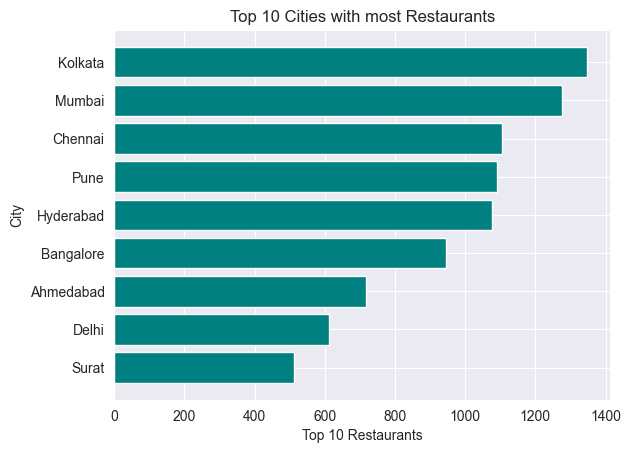

In [5]:
top_cities=swiggy['City'].value_counts().head(10)
plt.barh(top_cities.index,top_cities.values,color='teal')
plt.title("Top 10 Cities with most Restaurants")
plt.xlabel("Top 10 Restaurants")
plt.ylabel("City")
plt.gca().invert_yaxis()
plt.show()

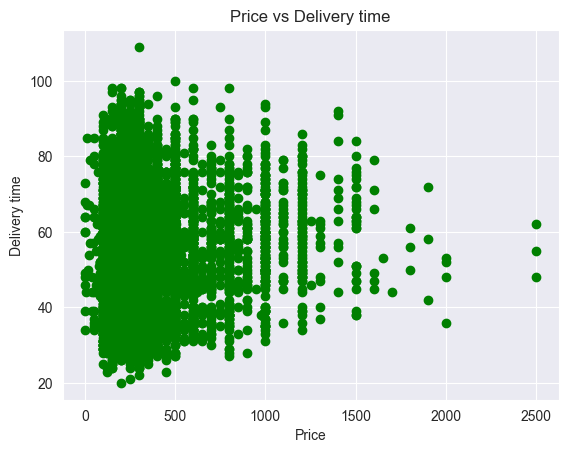

In [6]:
plt.scatter(swiggy['Price'],swiggy['Delivery time'],color='green')
plt.title('Price vs Delivery time')
plt.xlabel('Price')
plt.xlabel('Price')
plt.ylabel('Delivery time')
plt.show()

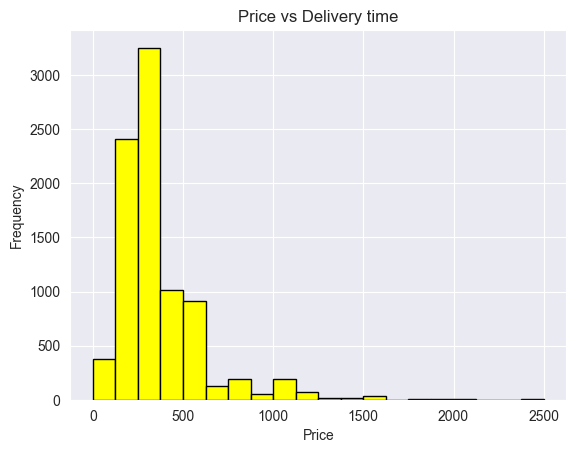

In [7]:
plt.hist(swiggy['Price'],bins=20,color='yellow',edgecolor='black')
plt.title('Price vs Delivery time')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

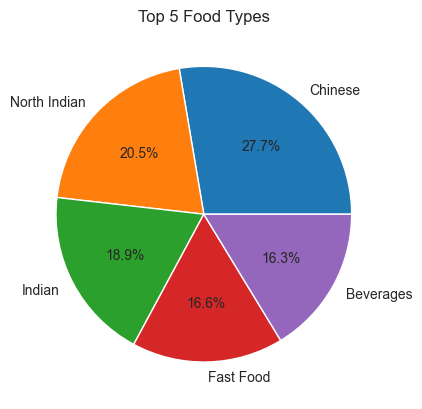

In [8]:
food=swiggy['Food type'].dropna().str.split(',').explode().str.strip()
top_foods=food.value_counts().head(5)
plt.pie(top_foods.values,labels=top_foods.index,autopct='%.1f%%')
plt.title('Top 5 Food Types')
plt.show()

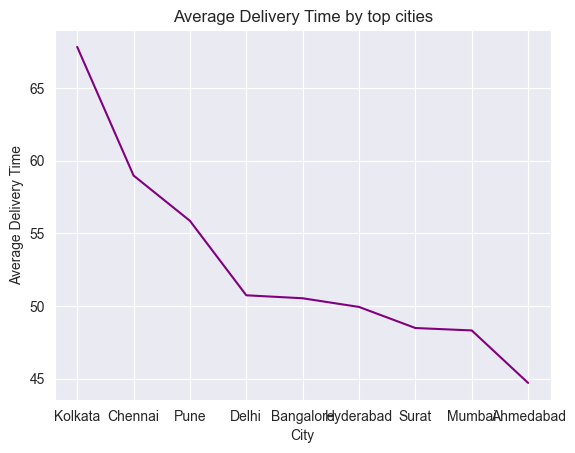

In [9]:
avg_delivery=swiggy.groupby('City')['Delivery time'].mean().sort_values(ascending=False).head(10)
plt.plot(avg_delivery.index,avg_delivery.values,color='purple')
plt.title('Average Delivery Time by top cities')
plt.xlabel('City')
plt.ylabel('Average Delivery Time')
plt.show()

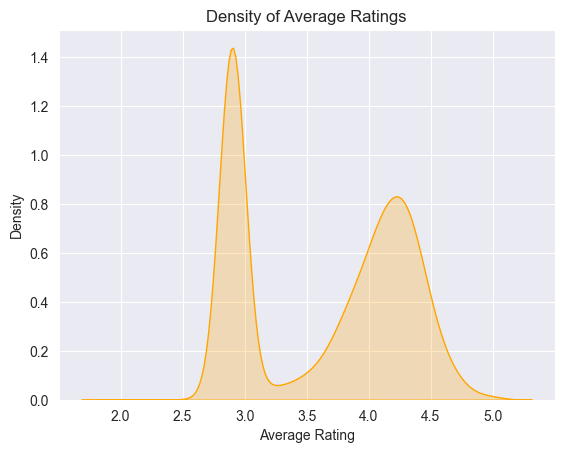

In [10]:
sns.kdeplot(swiggy["Avg ratings"], fill=True, color="orange")
plt.title("Density of Average Ratings")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.show()

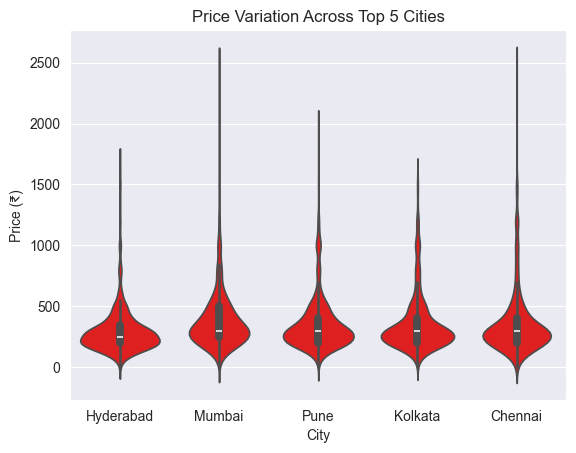

In [11]:
top5 = swiggy["City"].value_counts().head(5).index
sns.violinplot(x="City", y="Price", data=swiggy[swiggy["City"].isin(top5)],color="red")
plt.title("Price Variation Across Top 5 Cities")
plt.xlabel("City")
plt.ylabel("Price (₹)")
plt.show()

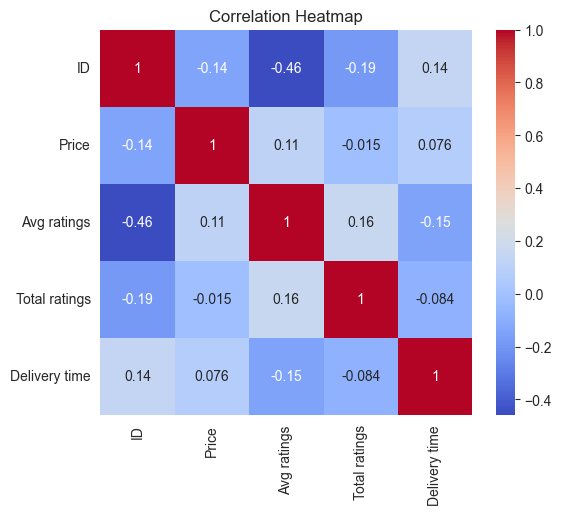

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(swiggy.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

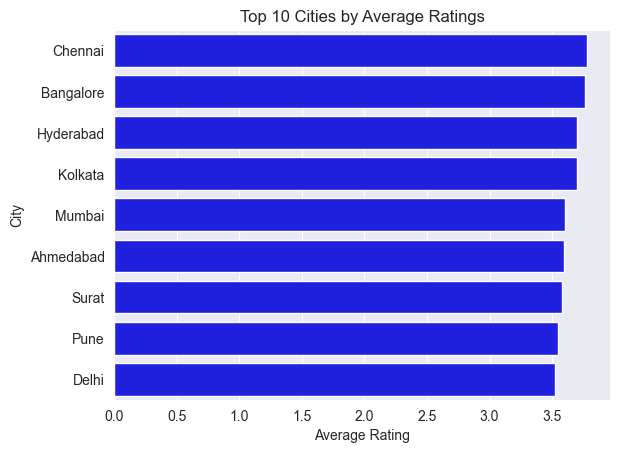

In [13]:
city_rating = swiggy.groupby('City')['Avg ratings'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=city_rating.values, y=city_rating.index, color='blue')
plt.title('Top 10 Cities by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()

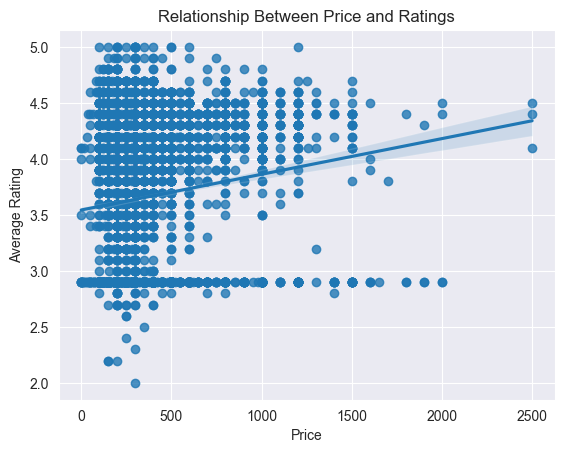

In [14]:
sns.regplot(x="Price", y="Avg ratings", data=swiggy)
plt.title("Relationship Between Price and Ratings")
plt.xlabel("Price")
plt.ylabel("Average Rating")
plt.show()